## Sampling and sampling rate

The sampling rate, measured in Hz, determines how many samples are taken per second. CD-quality audio has a rate of 44.1 kHz (44,100 Hz), while high-resolution audio typically uses 192 kHz. For training speech models, 16 kHz is common.

The sampling rate sets the upper limit for captured frequencies, known as the Nyquist limit, at half the rate. Since human speech frequencies are below 8 kHz, 16 kHz sampling suffices. Higher rates increase computational demands without adding information, while rates too low result in muffled audio, like that at 8 kHz.

## Amplitude and bit depth

1. **Amplitude and Loudness**: Amplitude in sound refers to the sound pressure level at any given instant, measured in decibels (dB), which we perceive as loudness. For instance, a normal speaking voice is typically under 60 dB, while a rock concert can reach around 125 dB.

2. **Digital Audio Sampling**: In digital audio, each sample records the amplitude of the audio wave at a particular time. The bit depth of the sample determines the precision with which this amplitude value can be described. Common bit depths are 16-bit and 24-bit, representing 65,536 and 16,777,216 possible steps, respectively.

3. **Quantization Noise**: When converting from continuous to discrete values during sampling, quantization noise is introduced. Higher bit depths result in smaller quantization noise, with 16-bit audio already being typically inaudible.

4. **32-bit Audio**: 32-bit audio stores samples as floating-point values, offering the same precision as 24-bit audio. Machine learning models often require audio data in floating-point format for processing.

5. **Decibel Scale**: Amplitudes in digital audio are often expressed in decibels (dB), which have a logarithmic scale. In digital audio, 0 dB represents the loudest possible amplitude, while all other amplitudes are negative. Every -6 dB represents a halving of the amplitude, and anything below -60 dB is generally inaudible without significantly amplifying the sound.

## Audio as a waveform

You may have seen sounds visualized as a waveform, which plots the sample values over time and illustrates the changes in the sound’s amplitude. This is also known as the time domain representation of sound.

In [3]:
import librosa

array, sampling_rate = librosa.load(librosa.ex("trumpet"))

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

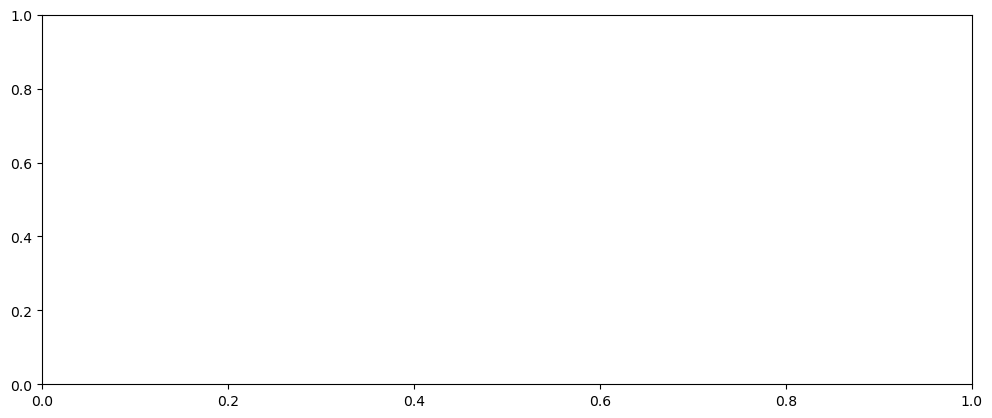

In [5]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

## The frequency spectrum

Another way to visualize audio data is to plot the frequency spectrum of an audio signal, also known as the frequency domain representation

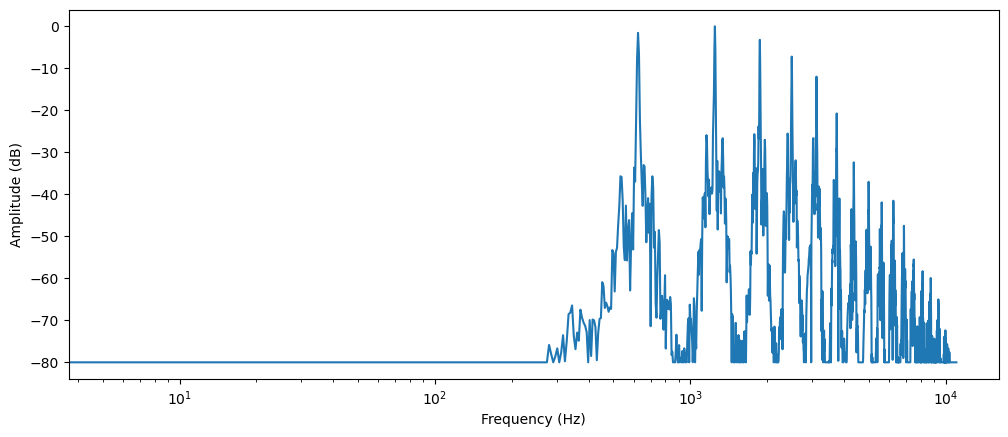

In [6]:
import numpy as np

dft_input = array[:4096]

# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

## Spectogram

What if we want to see how the frequencies in an audio signal change? The trumpet plays several notes and they all have different frequencies. The problem is that the spectrum only shows a frozen snapshot of the frequencies at a given instant. The solution is to take multiple DFTs, each covering only a small slice of time, and stack the resulting spectra together into a spectrogram.

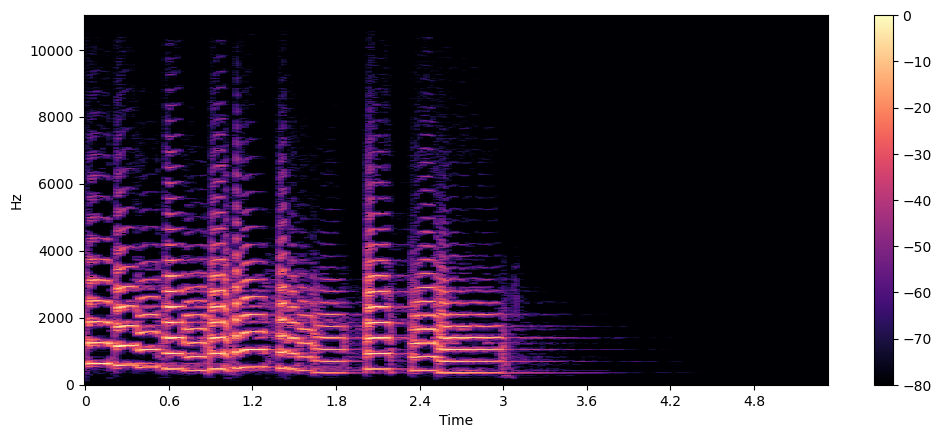

In [7]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

## Mel spectogram

A mel spectrogram is a variation of the spectrogram that is commonly used in speech processing and machine learning tasks. It is similar to a spectrogram in that it shows the frequency content of an audio signal over time, but on a different frequency axis.



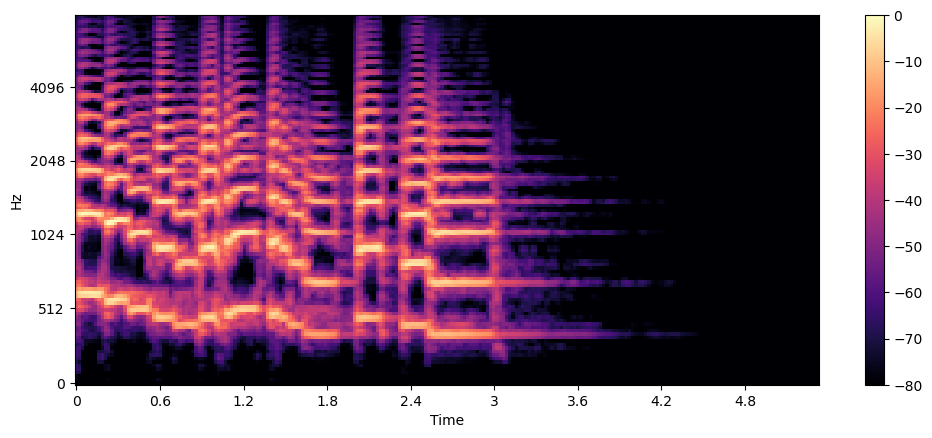

In [8]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()